<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter04/Exercise_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Value iteration implementation of the Jack's car rental problem.

The code is written in C. See [car_rental.c](https://github.com/enakai00/rl_book_solutions/blob/master/Chapter04/car_rental.c)

### Visualization of the result.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

In [0]:
policy = np.array(
[[ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -2, -2, -2, -3, -3, -3, -3, -3, -4, -4, -4],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -2, -2, -2, -2, -2, -3, -3, -3, -3],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -2, -2, -2, -2, -2],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -2],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1],
 [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 3,  3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 4,  3,  3,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 4,  4,  3,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  4,  4,  3,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  4,  3,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  4,  3,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  4,  4,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  3,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  4,  3,  3,  2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  5,  4,  4,  3,  3,  3,  3,  2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0]])

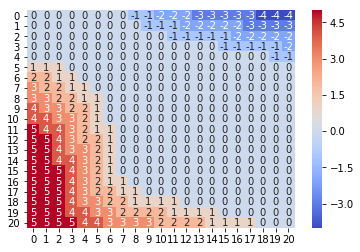

In [3]:
sns.heatmap(policy, annot=True, cmap='coolwarm')

In [0]:
value = np.array(
[[421, 431, 441, 451, 460, 469, 477, 485, 493, 500, 508, 515, 522, 528, 535, 541, 547, 552, 558, 563, 568],
 [431, 441, 451, 461, 470, 479, 487, 495, 502, 510, 517, 524, 530, 537, 543, 549, 554, 560, 565, 570, 574],
 [441, 451, 461, 470, 479, 488, 496, 504, 512, 519, 526, 532, 539, 545, 551, 556, 562, 567, 572, 576, 581],
 [450, 460, 469, 479, 488, 497, 505, 513, 521, 528, 534, 541, 547, 553, 558, 564, 569, 574, 578, 583, 587],
 [458, 468, 477, 487, 496, 505, 513, 521, 528, 535, 542, 548, 554, 560, 566, 571, 576, 580, 585, 589, 593],
 [466, 475, 485, 494, 504, 512, 520, 528, 535, 542, 549, 555, 561, 567, 572, 577, 582, 587, 591, 595, 598],
 [473, 483, 492, 502, 510, 519, 527, 535, 542, 549, 555, 561, 567, 573, 578, 583, 588, 592, 596, 600, 603],
 [481, 490, 500, 508, 517, 525, 533, 541, 548, 554, 561, 567, 572, 578, 583, 588, 592, 597, 601, 605, 608],
 [488, 498, 506, 515, 523, 531, 539, 546, 553, 559, 566, 572, 577, 582, 588, 592, 597, 601, 605, 609, 612],
 [496, 504, 513, 521, 529, 537, 544, 551, 558, 564, 570, 576, 582, 587, 592, 596, 601, 605, 609, 612, 615],
 [502, 511, 519, 527, 535, 542, 549, 556, 563, 569, 575, 580, 586, 591, 596, 600, 604, 609, 612, 616, 619],
 [509, 517, 525, 533, 540, 547, 554, 561, 567, 573, 579, 584, 590, 595, 599, 604, 608, 612, 615, 619, 622],
 [515, 523, 531, 538, 545, 552, 559, 565, 572, 577, 583, 588, 593, 598, 603, 607, 611, 615, 618, 621, 624],
 [521, 529, 536, 543, 550, 557, 563, 570, 576, 581, 587, 592, 597, 601, 606, 610, 614, 617, 621, 624, 627],
 [527, 534, 541, 548, 555, 561, 568, 574, 579, 585, 590, 595, 600, 604, 608, 612, 616, 620, 623, 626, 629],
 [532, 539, 546, 553, 559, 566, 572, 578, 583, 588, 593, 598, 603, 607, 611, 615, 619, 622, 625, 628, 631],
 [537, 544, 551, 557, 564, 570, 576, 581, 586, 592, 596, 601, 605, 609, 613, 617, 621, 624, 627, 630, 633],
 [542, 549, 555, 562, 568, 574, 579, 584, 590, 594, 599, 603, 608, 612, 615, 619, 623, 626, 629, 632, 634],
 [546, 553, 560, 566, 572, 577, 582, 588, 592, 597, 601, 606, 610, 614, 617, 621, 624, 627, 630, 633, 635],
 [551, 558, 564, 570, 575, 580, 586, 590, 595, 599, 604, 608, 612, 615, 619, 622, 625, 628, 631, 634, 636],
 [555, 561, 568, 573, 578, 584, 588, 593, 597, 602, 606, 610, 613, 617, 620, 623, 626, 629, 632, 635, 637]])

Text(0.5, 0, 'z')

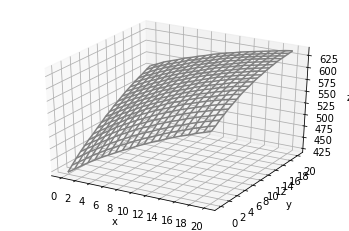

In [5]:
x = range(0, 21)
y = range(0, 21)

X, Y = np.meshgrid(x, y)
Z = value[Y, X]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='gray')
ax.set_xticks(range(0, 21, 2))
ax.set_yticks(range(0, 21, 2))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Value iteration implementation of Exercise 4.7.

The code is written in C. See [car_rental2.c](https://github.com/enakai00/rl_book_solutions/blob/master/Chapter04/car_rental2.c)

### Visualization of the result.

In [0]:
policy = np.array(
[[ 0,  0,  0,  0,  0,  0,  0, -1, -1, -2, -2, -3, -3, -3, -4, -5, -4, -4, -5, -5, -5],
 [ 1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -2, -2, -2, -3, -4, -5, -3, -4, -4, -4, -4],
 [ 1,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -2, -3, -4, -5, -3, -3, -3, -3, -3],
 [ 1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0, -1, -2, -3, -4, -5, -2, -2, -2, -2, -2],
 [ 1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0, -1, -2, -3, -4, -1, -1, -1, -1, -1, -1],
 [ 1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -2, -3,  0,  0,  0,  0,  0,  0, -1],
 [ 2,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0, -1, -2,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 2,  2,  1,  1,  1,  1,  1,  1,  1,  0,  0, -1, -2,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 3,  2,  2,  1,  1,  1,  1,  1,  1,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 3,  3,  2,  2,  1,  1,  1,  1,  1,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 4,  3,  3,  2,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 4,  4,  3,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
 [ 5,  4,  3,  3,  2,  2,  2,  2,  2,  1,  0,  2,  2,  2,  2,  2,  2,  2,  2,  1,  0],
 [ 5,  4,  4,  3,  3,  3,  3,  3,  1,  1,  0, -1,  3,  3,  3,  3,  3,  3,  1,  1,  0],
 [ 5,  5,  4,  4,  4,  4,  4,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
 [ 5,  5,  5,  5,  5,  5,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
 [ 5,  5,  4,  4,  3,  2,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
 [ 5,  5,  5,  4,  3,  2,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
 [ 5,  5,  5,  4,  3,  2,  2,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
 [ 5,  5,  5,  4,  3,  3,  2,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
 [ 5,  5,  5,  4,  4,  3,  2,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0]])

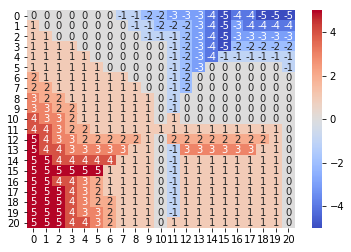

In [7]:
sns.heatmap(policy, annot=True, cmap='coolwarm')

In [0]:
value = np.array(
[[430, 440, 450, 459, 468, 477, 485, 493, 501, 508, 515, 522, 529, 535, 541, 546, 548, 552, 556, 560, 564],
 [440, 450, 460, 469, 478, 487, 495, 503, 510, 517, 524, 531, 537, 543, 548, 552, 554, 558, 562, 566, 569],
 [450, 460, 469, 479, 488, 497, 505, 512, 519, 526, 533, 539, 545, 550, 554, 558, 560, 564, 568, 571, 574],
 [459, 469, 479, 488, 497, 505, 514, 521, 528, 535, 541, 547, 552, 556, 560, 563, 566, 570, 573, 576, 579],
 [468, 478, 488, 497, 505, 514, 522, 529, 536, 543, 549, 554, 558, 562, 565, 568, 572, 575, 578, 581, 583],
 [477, 487, 496, 505, 514, 522, 529, 537, 543, 550, 556, 560, 564, 567, 570, 574, 577, 580, 583, 585, 588],
 [485, 494, 504, 513, 521, 529, 537, 543, 550, 556, 562, 566, 569, 572, 575, 579, 582, 585, 587, 590, 592],
 [492, 502, 511, 520, 528, 536, 543, 550, 556, 562, 568, 571, 573, 576, 580, 583, 586, 589, 591, 593, 595],
 [500, 509, 518, 527, 535, 543, 550, 556, 562, 568, 573, 575, 577, 581, 584, 587, 589, 592, 594, 596, 598],
 [507, 516, 525, 533, 541, 548, 555, 562, 567, 573, 577, 579, 581, 584, 587, 590, 592, 595, 597, 599, 600],
 [514, 523, 531, 539, 547, 554, 561, 567, 572, 577, 581, 581, 584, 587, 590, 592, 595, 597, 599, 601, 602],
 [521, 529, 537, 545, 552, 559, 565, 571, 576, 581, 581, 584, 587, 590, 592, 595, 597, 599, 601, 602, 599],
 [527, 535, 543, 550, 557, 563, 569, 574, 579, 580, 583, 585, 588, 590, 593, 595, 597, 599, 600, 599, 600],
 [533, 541, 548, 555, 561, 567, 572, 577, 579, 583, 586, 586, 588, 591, 593, 595, 597, 598, 599, 600, 601],
 [539, 546, 553, 559, 565, 570, 575, 578, 582, 586, 588, 588, 590, 592, 593, 595, 597, 598, 600, 601, 601],
 [544, 551, 557, 563, 568, 573, 576, 581, 585, 588, 590, 590, 591, 593, 595, 596, 598, 599, 600, 601, 601],
 [545, 552, 558, 564, 569, 574, 579, 583, 587, 590, 592, 591, 593, 594, 596, 597, 598, 600, 601, 601, 602],
 [549, 556, 562, 567, 572, 577, 581, 585, 589, 592, 593, 593, 594, 595, 597, 598, 599, 600, 601, 602, 602],
 [553, 560, 565, 570, 575, 579, 583, 587, 591, 593, 595, 594, 595, 596, 597, 599, 600, 601, 602, 602, 603],
 [557, 563, 568, 573, 577, 581, 585, 589, 592, 595, 596, 595, 596, 597, 598, 599, 600, 601, 602, 603, 603],
 [560, 566, 571, 575, 579, 583, 587, 590, 593, 596, 597, 596, 597, 598, 599, 600, 601, 602, 602, 603, 603]])

Text(0.5, 0, 'z')

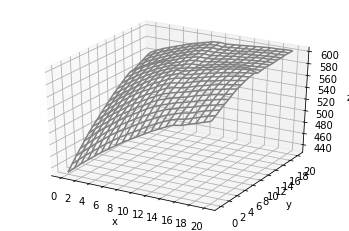

In [9]:
x = range(0, 21)
y = range(0, 21)

X, Y = np.meshgrid(x, y)
Z = value[Y, X]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='gray')
ax.set_xticks(range(0, 21, 2))
ax.set_yticks(range(0, 21, 2))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')